# Classy Harmonic module

Once again, we import our modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classy import Class

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
})


To get the harmonic spectra, we will need to ask for them explicitly, similar to the $k$-space power spectra of the Fourier module

In [2]:
l_max_scalars = 5000
l_max_lss = 1000


cosmo = Class()
cosmo.set({'perturbations_verbose':1,
           'non_linear':'hmcode',
           'output':'tCl,pCl,lCl,nCl,sCl',
           'lensing':'yes',
           'l_max_scalars':l_max_scalars,
           'l_max_lss':l_max_lss})

True

Now we can extract the raw (unlensed) and lensed $C_\ell$ dictionaries from Class

In [3]:
raw_Cl = cosmo.raw_cl(l_max_scalars)
lensed_Cl = cosmo.lensed_cl(l_max_scalars)

Computing sources
Computing sources


Let's see what the dictionaries contain:


In [4]:
print(f'Raw C_l keys: {raw_Cl.keys()}')
print(f'Lensed C_l keys: {lensed_Cl.keys()}')

Raw C_l keys: dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])
Lensed C_l keys: dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])


So the raw and lensed dictionaries contain the CMB angular power spectra, while density contains the galaxy number count and lensing spectra and cross-corellations between them.

Let's plot some CMB spectra:

(2, 5000)

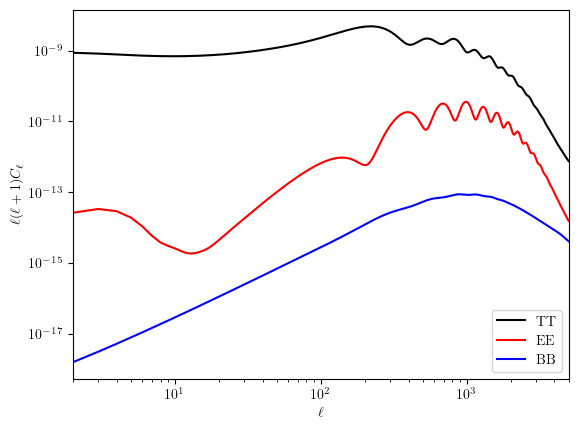

In [5]:
l_cmb = raw_Cl['ell']

lensed_TT = lensed_Cl['tt']
lensed_EE = lensed_Cl['ee']
lensed_BB = lensed_Cl['bb']


plt.loglog(l_cmb, l_cmb*(l_cmb+1)*lensed_TT,'k',label='TT')
plt.loglog(l_cmb, l_cmb*(l_cmb+1)*lensed_EE,'r',label='EE')
plt.loglog(l_cmb, l_cmb*(l_cmb+1)*lensed_BB,'b',label='BB')
plt.legend()
plt.xlabel('$\\ell$')
plt.ylabel('$ \\ell (\\ell + 1) C_\\ell$')

plt.xlim([2,l_max_scalars])

Let's also look at the impact of lensing on the spectra:

/tmp/ipykernel_82631/3462232992.py:4: RuntimeWarning: invalid value encountered in divide
  plt.plot(l_cmb, lensed_TT / raw_TT -1,'k',label='TT')
/tmp/ipykernel_82631/3462232992.py:6: RuntimeWarning: invalid value encountered in divide
  plt.plot(l_cmb, lensed_EE / raw_EE -1,'r',label='EE')


Text(0, 0.5, '$C_{\\ell}^\\mathrm{lensed} / C_{\\ell}^\\mathrm{raw} - 1$')

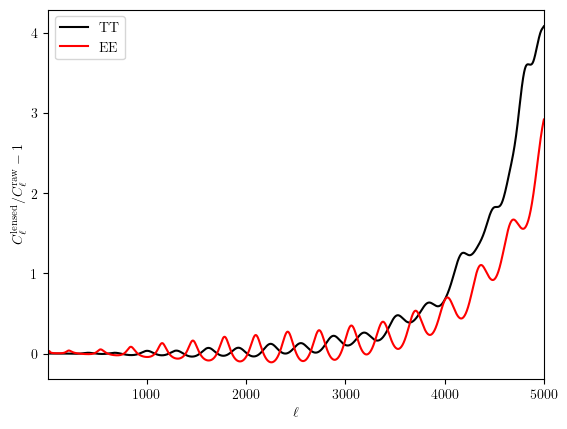

In [6]:
raw_TT = raw_Cl['tt']
raw_EE = raw_Cl['ee']

plt.plot(l_cmb, lensed_TT / raw_TT -1,'k',label='TT')

plt.plot(l_cmb, lensed_EE / raw_EE -1,'r',label='EE')

plt.legend()
plt.xlim([2,l_max_scalars])

plt.xlabel('$\\ell$')
plt.ylabel('$C_{\\ell}^\\mathrm{lensed} / C_{\\ell}^\\mathrm{raw} - 1$')

It quickly becomes evident that, while lensing is always an important effect to take into account, its importance is much greater for recent CMB experiments like SPT and ACT, which go to significantly higher $\ell$ than Planck or WMAP.

The galaxy density and lensing spectra have a few more parameters governing them, which we left at their default values. This is because they are computed for specific redshift bins, each with a centre and a width.

These parameters and their defaults are:
- `selection = gaussian`, which gives the shape of the selection function $W(z)$ of each bin. The available options are `gaussian`, `tophat`, or `dirac`.
- `selection_mean = 1` gives the bin centres to compute, provided as a list of $z$ values.
- `selection_width = 0.1` gives the width of the bins, meaning the half-width of a tophat or the standard deviation of a Gaussian, also provided as a single value (for equal-width bins) or list of values in $z$ space.
- `selection_bias = 1.0` and `selection_magnification_bias = 0`, are biases can can be provided as either a single global number, or as a list of a value per bin.
- `non_diagonal = 0`, the number of cross-correlations between redshift bins computed. 0 means only auto-correlation, 1 means only adjacent bins, etc. up to $N_\text{bins} -1$ meaning all correlations.
- `dNddz_selection` lets you provide a selection function to multiply with the window function. Can be provided in the form of the filename of a text file containing tabulated redshifts and function values, or set to `analytic` to use the analytic expression of [arXiv:1004.4640](https://arxiv.org/abs/1004.4640). The default of leaving it blank means a uniform distribution function.
- `dNdz_evolution` lets you provide an evolution of source number counts. Can similarly be provided as a file of tabulated values, or `analytic` to use the expression in eq. 48 of [arXiv:1105.5292](https://arxiv.org/abs/1105.5292). Again, the default of leaving it blank means constant comoving number densities.


Let's add some bins and widths to our cosmology:

In [7]:
cosmo.set({'selection_mean':'0.9,1.0,1.1',
           'selection_width':0.1})

True

In [8]:
density_Cl = cosmo.density_cl(l_max_lss)
print(f'Density C_l keys: {density_Cl.keys()}')

Computing sources
Density C_l keys: dict_keys(['dd', 'll', 'dl', 'ell'])


Each dictionary entry here (except `'ell'`) is then another dictionary, containing each set of correlations, here just the autocorrelations of each of our three bins:

In [9]:
print(f'Density C_l["dd"] keys: {density_Cl["dd"].keys()}')

Density C_l["dd"] keys: dict_keys(['dens[1]-dens[1]', 'dens[2]-dens[2]', 'dens[3]-dens[3]'])


Let's make a density $C_\ell$ plot:

Text(0, 0.5, '$ \\frac{\\ell (\\ell + 1)}{2\\pi} C_\\ell^{dd} $')

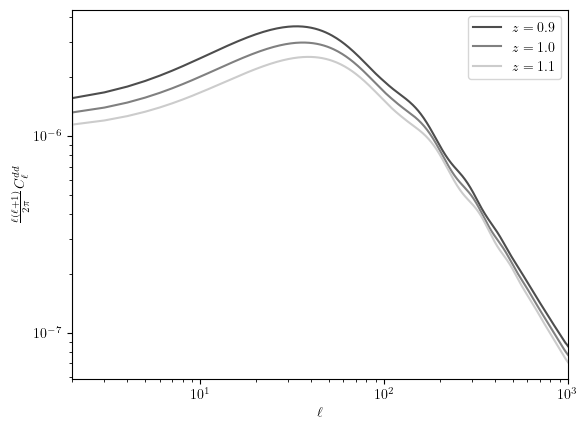

In [10]:
l_density = density_Cl['ell']

Cl_dd_z09 = density_Cl['dd']['dens[1]-dens[1]']
Cl_dd_z10 = density_Cl['dd']['dens[2]-dens[2]']
Cl_dd_z11 = density_Cl['dd']['dens[3]-dens[3]']


plt.loglog(l_density,Cl_dd_z09,color='0.3',label='$z=0.9$')
plt.loglog(l_density,Cl_dd_z10,color='0.5',label='$z=1.0$')
plt.loglog(l_density,Cl_dd_z11,color='0.8',label='$z=1.1$')

plt.legend()

plt.xlim([2,l_max_lss])

plt.xlabel('$\\ell$')
plt.ylabel('$ \\frac{\\ell (\\ell + 1)}{2\\pi} C_\\ell^{dd} $')

And similarly for lensing:

Text(0, 0.5, '$ \\frac{\\ell (\\ell + 1)}{2\\pi} C_\\ell^{SS} $')

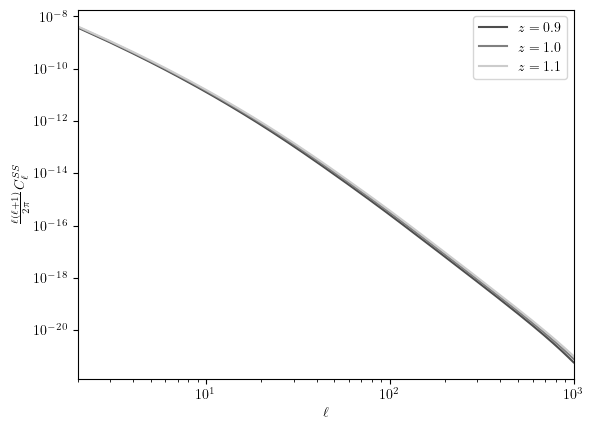

In [11]:
Cl_ll_09 = density_Cl['ll']['lens[1]-lens[1]']
Cl_ll_10 = density_Cl['ll']['lens[2]-lens[2]']
Cl_ll_11 = density_Cl['ll']['lens[3]-lens[3]']

plt.loglog(l_density,Cl_ll_09,color='0.3',label='$z=0.9$')
plt.loglog(l_density,Cl_ll_10,color='0.5',label='$z=1.0$')
plt.loglog(l_density,Cl_ll_11,color='0.8',label='$z=1.1$')

plt.legend()

plt.xlim([2,l_max_lss])

plt.xlabel('$\\ell$')
plt.ylabel('$ \\frac{\\ell (\\ell + 1)}{2\\pi} C_\\ell^{SS} $')